# 快速打开多个搜索引擎搜索同一关键词

## 环璄变量

将 bat 脚本(s.bat)或打包好的 exe (s.exe)放到指定环璄变量的目录下。

使用 google, duckduckgo, bing, baidu 搜索 “a b c”：

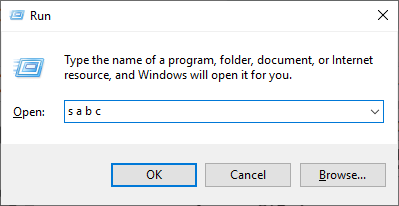


## bat 脚本

`s.bat`

```shell
REM open chrome in new window
call "cmd /c start chrome --args --new-window https://google.com/search?q="%*" https://duckduckgo.com/?q="%*" https://bing.com/search?q="%*" https://www.baidu.com/s?wd="%*" "

ping -n 10 127.0.0.1 1>nul 2>nul
```

## python 脚本

file: `s.py`

```python
#!/usr/bin/python3.9
from os import popen
from sys import argv

args = argv[1:]   # 参数是以空格分隔的
content = '%20'.join(args)  # 搜索关键词，合为一个字符串时，以空格分隔

chrome = r'"C:\Program Files\Google\Chrome\Application\chrome.exe"'

popen(f'{chrome} --args --new-window \
        "https://google.com/search?q={content}" \
        "https://duckduckgo.com/?q={content}" \
        "https://bing.com/search?q={content}" \
        "https://www.baidu.com/s?wd={content}"')
```


使用 pyinstaller 打包：

```shell
# 打包为单个 exe，s.py 会生成 s.exe 到 dist 目录下
pyinstaller -F s.py
```


## 清空 run 历史记录

搜索多了，run 记录就非常长。

清空 run 历史记录的脚本：

file: `clear.py`

```python
from winreg import *

# 1. 连接注册表根键
regRoot = ConnectRegistry(None, HKEY_CURRENT_USER)

subDir = r'Software\Microsoft\Windows\CurrentVersion\Explorer\RunMRU'
# 2. 获取指定目录下所有键的控制
keyHandle = OpenKey(regRoot, subDir, access=KEY_ALL_ACCESS)

# 3. 存放所有的键名
lis = []
try:
    count = 0
    while True:
        name, value, _type = EnumValue(keyHandle, count)
        print(name, value, _type)
        lis.append(name)

        count += 1
except Exception as err:
    print(err)

# 4. 删除键
for k in lis: DeleteValue(keyHandle, k)

# 5. 关闭
CloseKey(keyHandle)
CloseKey(regRoot)
```

同样的，将其打包为 exe 放到指定的环境变量目录下，就可以快速清理了。